In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.datasets import load_boston

boston = load_boston()




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [12]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
df = pd.DataFrame([boston])

df


,data,target,feature_names,DESCR,filename,data_module
0,"[[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2...","[24.0, 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27....","[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",.. _boston_dataset:\n\nBoston house prices dat...,boston_house_prices.csv,sklearn.datasets.data


In [10]:
# Provide the Summary Statistics of the Dataset

boston.describe(include = "all")

AttributeError: ignored

In [14]:
sns.heatmap(boston.corr(), linewidths=1.5, linecolor='white', cmap='coolwarm', annot=True)


AttributeError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

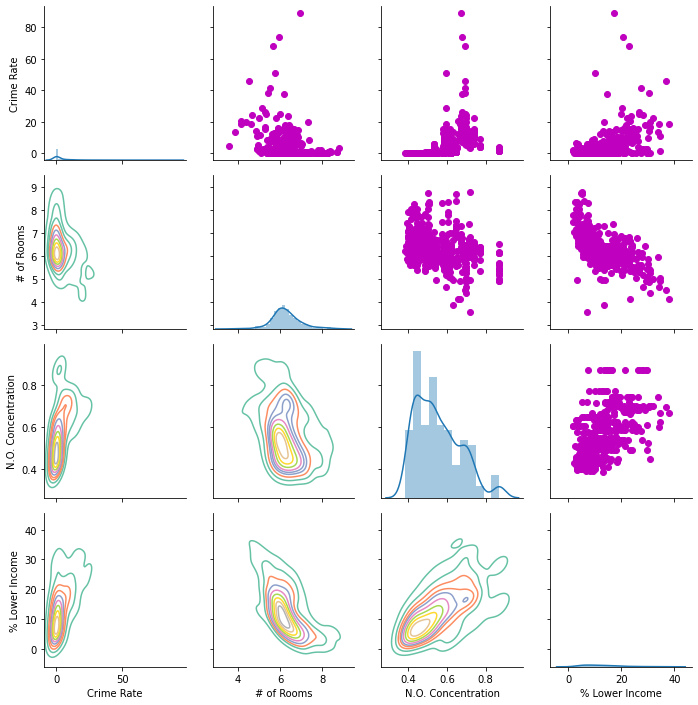

In [ ]:
g = sns.PairGrid(df[['Crime Rate', '# of Rooms', 'N.O. Concentration', '% Lower Income']])
g.map_upper(plt.scatter, color="m")
g.map_lower(sns.kdeplot, cmap="Set2")
g.map_diag(sns.distplot);

In [ ]:
df.isnull().sum()

Crime Rate                    0
Residential Land Zones        0
Non-retail Business Acres     0
Charles River tract bounds    0
N.O. Concentration            0
# of Rooms                    0
Age                           0
Distance to Employment        0
Highway Accessibility         0
Property Tax Rate             0
Pupil Teacher Ratio           0
% Lower Income                0
dtype: int64

In [ ]:
# Dividing up features (X) and target variables (y)
X = df.drop("Median Home Value", axis=1).values
y= df['Median Home Value'].values

# Creating training and testing dataset. I am removing one quarter from the training dataset (0.25) for validation testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Instantiate the scaler and fit to training dataset, X_train
scaler = MinMaxScaler()
scaler.fit(X_train)

# Replace unscaled values with scaled values
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

KeyError: ignored

In [ ]:
model.fit(X_train, y_train, epochs=500, callbacks=[early_stop], validation_data=[X_test, y_test], verbose=0)

NameError: ignored

In [ ]:
loss_df = pd.DataFrame(model.history.history)loss_df[['loss', 'val_loss']].plot()plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

In [ ]:
arr_predictions = np.array([x[0] for x in predictions])errors = y_test - arr_predictionsfig = plt.figure(figsize=(15, 5))sub1 = fig.add_subplot(121)# Our predictions
plt.scatter(y_test,predictions)# Perfect predictions
plt.plot(y_test,y_test,'r')plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Visualizing Residuals with Scatter Plot")sub1 = fig.add_subplot(122)
sns.distplot(errors)plt.xlabel("Residuals")
plt.ylabel("Distribution")
plt.title("Visualizing Residuals with Dist Plot");